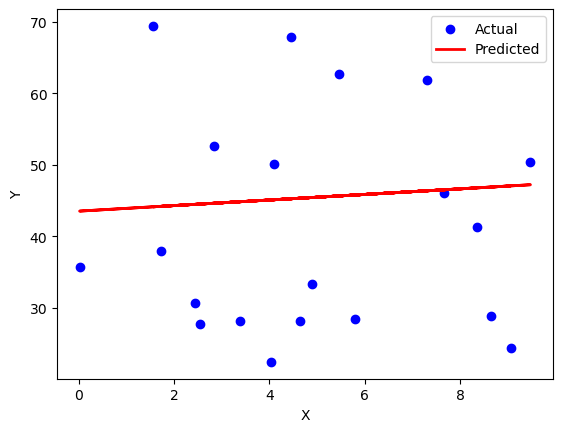

R-squared: -0.0809


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
data = {
    'X': np.random.rand(100) * 10,  
    'Y': np.random.rand(100) * 50 + 20 
}
df = pd.DataFrame(data)
X = df[['X']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(f'R-squared: {r2:.4f}')

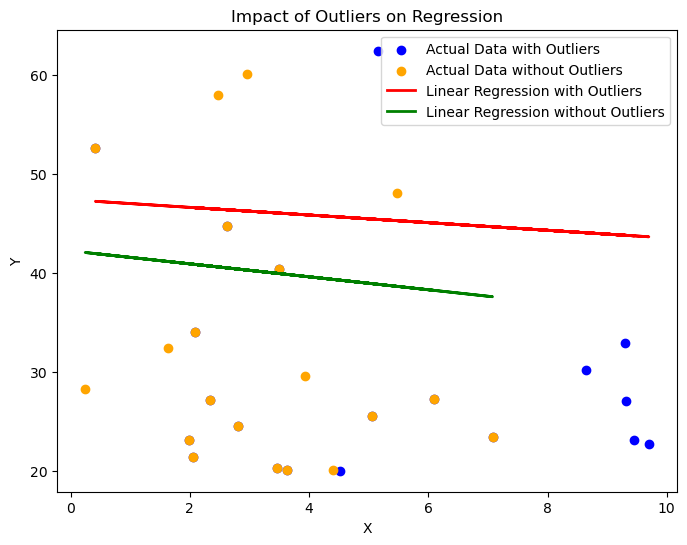

Linear R-squared with outliers: -1.8137
Linear R-squared without outliers: -0.2792


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
data = {
    'X': np.random.rand(100) * 10,
    'Y': np.random.rand(100) ** 2 * 50 + 20  
}
df = pd.DataFrame(data)
df.loc[95:99, 'Y'] *= 3
X = df[['X']]
y = df['Y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Q1 = df['Y'].quantile(0.25)
Q3 = df['Y'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Y'] < (Q1 - 1.5 * IQR)) | (df['Y'] > (Q3 + 1.5 * IQR))]
df_no_outliers = df.drop(outliers.index)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
X_clean = df_no_outliers[['X']]
y_clean = df_no_outliers['Y']
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
linear_model_clean = LinearRegression()
linear_model_clean.fit(X_train_clean, y_train_clean)
y_pred_linear_clean = linear_model_clean.predict(X_test_clean)
r2_linear_clean = r2_score(y_test_clean, y_pred_linear_clean)
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data with Outliers')
plt.scatter(X_test_clean, y_test_clean, color='orange', label='Actual Data without Outliers')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Linear Regression with Outliers')
plt.plot(X_test_clean, y_pred_linear_clean, color='green', linewidth=2, label='Linear Regression without Outliers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Impact of Outliers on Regression')
plt.legend()
plt.show()
print(f'Linear R-squared with outliers: {r2_linear:.4f}')
print(f'Linear R-squared without outliers: {r2_linear_clean:.4f}')


